In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os

In [8]:
from pathlib import Path

In [9]:
MODEL_PATH = Path("/workspaces/bartesian/models/fsrcnn_x2.pb")
IMAGE_DIR = Path("/workspaces/bartesian/images/raw_images")
CROPPED_IMAGE_DIR = Path("/workspaces/bartesian/images/cropped_images")
RESIZED_IMAGE_DIR = Path("/workspaces/bartesian/images/resized_images")

In [14]:
def show(imgs):
    if len(imgs) == 1:
        plt.imshow(imgs[0])
        plt.show()
        return

    num_columns = min(len(imgs), 4)
    _, ax = plt.subplots(max(1, (len(imgs) + num_columns)//num_columns), num_columns)
    for i, img in enumerate(imgs):
        if len(imgs) > num_columns:
            ax[i//num_columns, i%num_columns].imshow(img)
        else:
            ax[i%num_columns].imshow(img)
    plt.show()

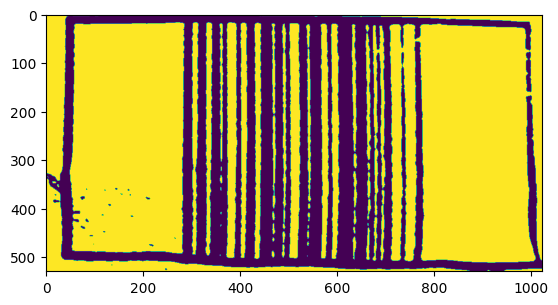

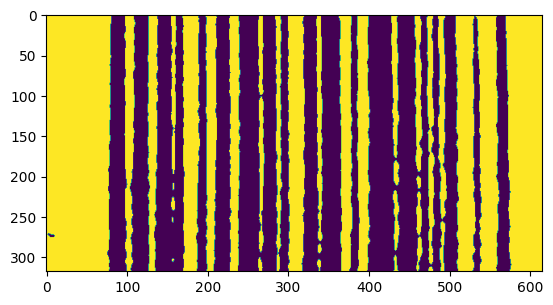

averaged_row: 3.0,2.0,3.0,2.0,3.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,1.0,4.0,2.0,1.0,2.0,5.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,4.0,2.0
83
0[PXL_20240121_013842468.MP]	739d8ce7bb1de4fbd5843
1  1  1  0  0  1  1  1  0  0  1  1  1  0  1  1  0  0  0  1  1  0  0  1  1  1  0  0  1  1  1  1  0  1  1  1  0  1  1  0  0  0  1  1  1  0  1  1  1  1  0  0  1  0  0  1  1  1  1  1  0  1  1  1  1  0  1  0  1  0  1  1  0  0  0  0  1  0  0  0  0  1  1


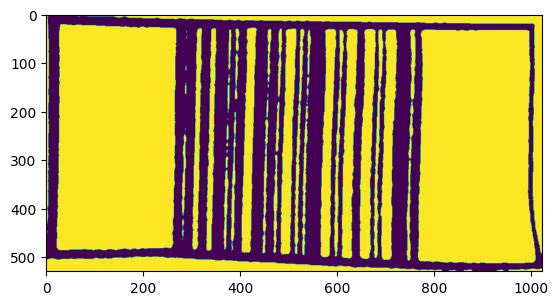

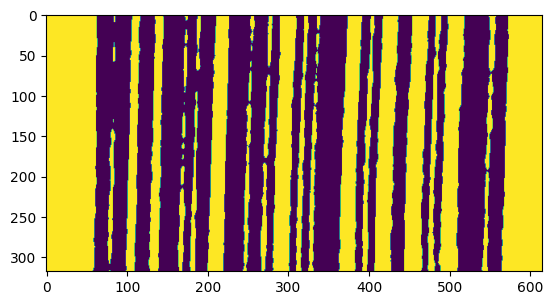

averaged_row: 2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,4.0,1.0,2.0
60
0[PXL_20240121_013857214.MP]	0db759da5794ca7b
1  1  0  1  1  0  1  1  0  1  1  1  0  1  0  1  1  0  0  1  1  1  0  1  1  0  1  0  0  1  0  1  0  1  1  1  1  0  0  1  0  1  0  0  1  1  0  0  1  0  1  0  0  1  1  1  1  0  1  1


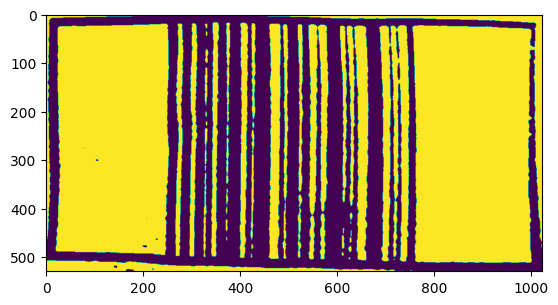

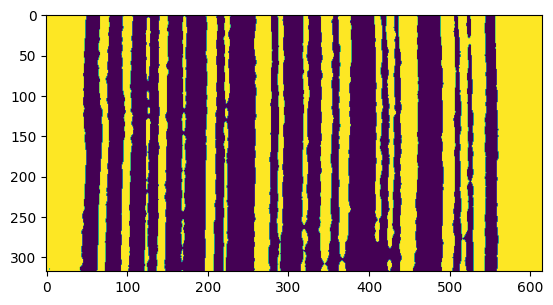

averaged_row: 3.0,1.0,3.0,1.0,3.0,0.0,2.0,2.0,3.0,1.0,4.0,2.0,2.0,1.0,5.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,2.0,5.0,1.0,1.0,1.0,1.0,3.0,5.0,2.0,1.0,1.0,1.0,2.0,2.0
76
0[PXL_20240121_013909370]	eef9de6f8bd93ea3e53
1  1  1  0  1  1  1  0  1  1  1  1  1  0  0  1  1  1  0  1  1  1  1  0  0  1  1  0  1  1  1  1  1  0  0  0  1  0  1  1  1  1  0  1  1  0  0  1  0  0  1  1  1  1  1  0  1  0  1  0  0  0  1  1  1  1  1  0  0  1  0  1  0  0  1  1


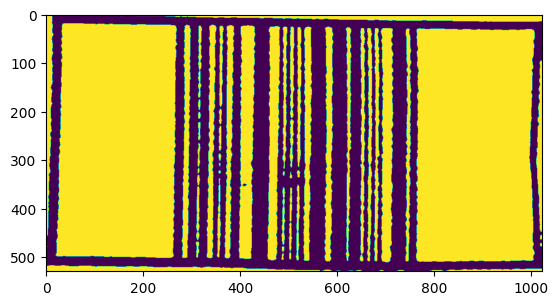

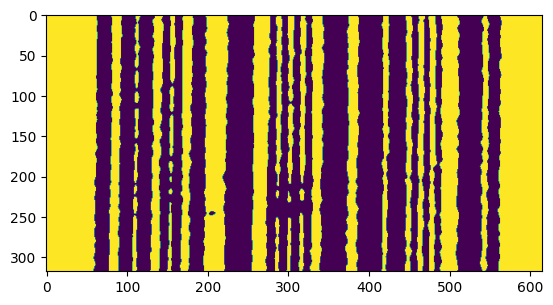

averaged_row: 3.0,2.0,3.0,1.0,3.0,2.0,1.0,1.0,2.0,2.0,3.0,4.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,2.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,2.0
75
1[PXL_20240121_184849045]	73b9670f8aa7cf7547b
1  1  1  0  0  1  1  1  0  1  1  1  0  0  1  0  1  1  0  0  1  1  1  0  0  0  0  1  1  1  1  1  0  0  0  1  0  1  0  1  0  1  0  0  1  1  1  1  1  0  0  1  1  1  1  0  1  1  1  0  1  0  1  0  1  0  0  0  1  1  1  1  0  1  1


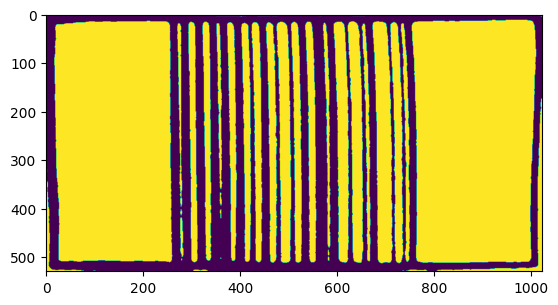

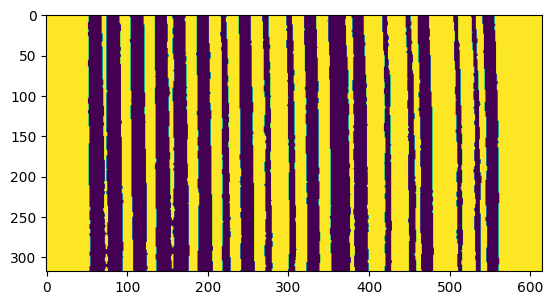

averaged_row: 3.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,3.0,1.0,3.0,1.0,1.0,2.0,4.0,1.0,2.0,1.0,1.0,2.0
70
0[PXL_20240121_013733706.MP]	3b99b32644cec4584b
1  1  1  0  1  1  1  0  0  1  1  0  0  1  1  0  1  1  0  0  1  1  0  0  1  0  0  1  1  0  0  1  0  0  0  1  0  0  1  1  0  0  1  1  1  0  1  1  0  0  0  1  0  0  0  1  0  1  1  0  0  0  0  1  0  0  1  0  1  1


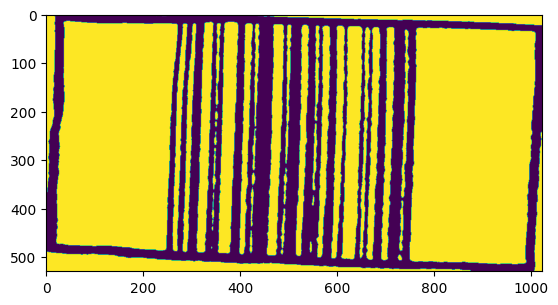

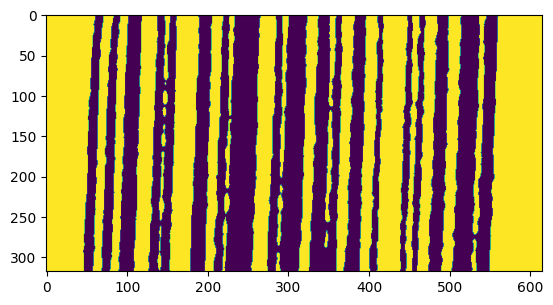

averaged_row: 2.0,2.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0,4.0,2.0,2.0,1.0,1.0,4.0,3.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0
70
0[PXL_20240121_013815977.MP]	3371432f1734c8533b
1  1  0  0  1  1  0  1  1  1  0  0  0  1  0  1  0  0  0  0  1  1  0  0  1  0  1  1  1  1  0  0  0  1  0  1  1  1  0  0  1  1  0  1  0  0  1  1  0  0  1  0  0  0  0  1  0  1  0  0  1  1  0  0  1  1  1  0  1  1


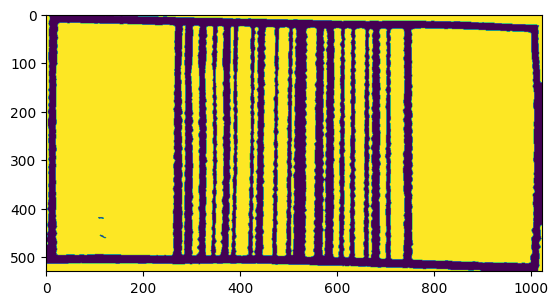

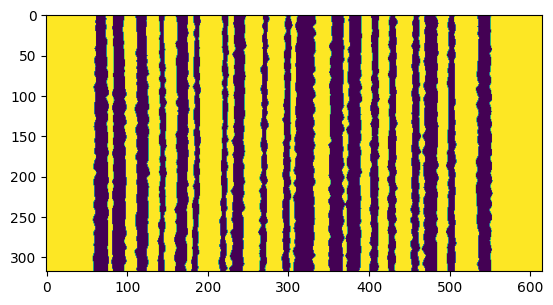

averaged_row: 2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0,1.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0
67
0[PXL_20240121_184912979]	6cc9a1622e6c91643
1  1  0  1  1  0  0  1  1  0  0  1  0  0  1  1  0  1  0  0  0  0  1  0  1  1  0  0  0  1  0  0  0  1  0  1  1  1  0  0  1  1  0  1  1  0  0  1  0  0  1  0  0  0  1  0  1  1  0  0  1  0  0  0  0  1  1


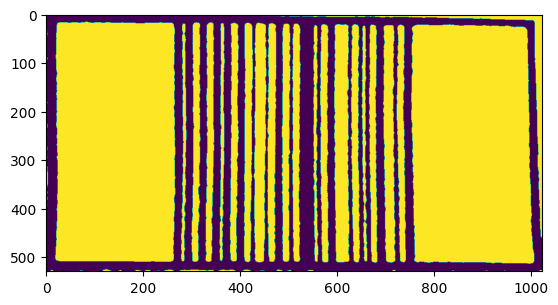

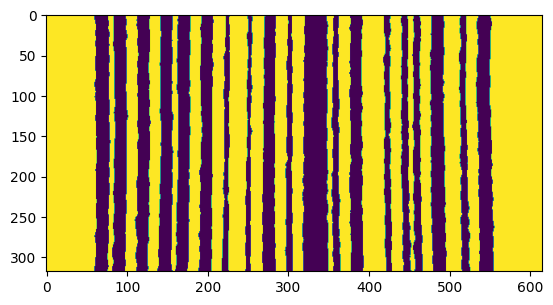

averaged_row: 2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0,1.0,1.0,2.0,2.0,4.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
68
0[PXL_20240121_013747782]	d99b32264f4c25313
1  1  0  1  1  0  0  1  1  0  0  1  1  0  1  1  0  0  1  1  0  0  1  0  0  0  1  0  0  1  1  0  0  1  0  0  1  1  1  1  0  1  0  0  1  1  0  0  0  0  1  0  0  1  0  1  0  0  1  1  0  0  0  1  0  0  1  1


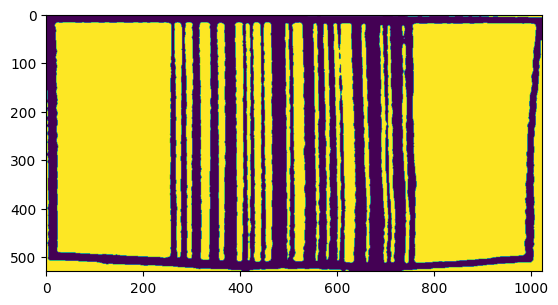

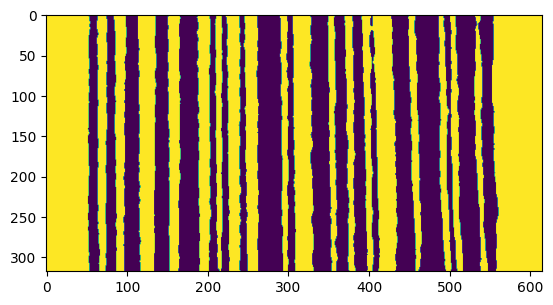

averaged_row: 2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,1.0,1.0,3.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,4.0,1.0,1.0,1.0,3.0,1.0,2.0
73
0[PXL_20240121_013832187.MP]	199c73ca4f476d1debb
1  1  0  0  1  1  0  0  1  1  1  0  0  0  1  1  1  0  0  1  1  1  1  0  0  1  0  1  0  0  1  0  0  1  1  1  1  0  1  0  0  0  1  1  1  0  1  1  0  1  1  0  1  0  0  0  1  1  1  0  1  1  1  1  0  1  0  1  1  1  0  1  1


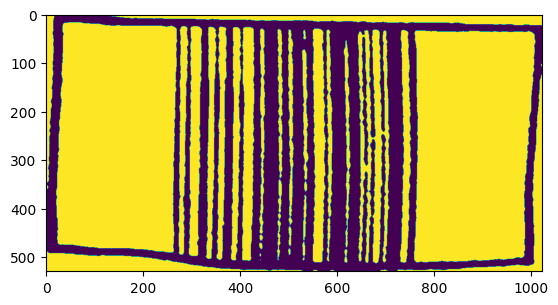

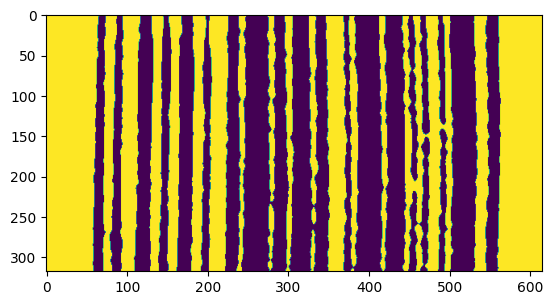

averaged_row: 2.0,2.0,1.0,3.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,4.0,1.0,2.0,1.0,3.0,1.0,2.0,3.0,1.0,1.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0,2.0
70
0[PXL_20240121_013850719.MP]	32393237b762f752f3
1  1  0  0  1  0  0  0  1  1  1  0  0  1  0  0  1  1  0  0  1  0  0  0  1  1  0  1  1  1  1  0  1  1  0  1  1  1  0  1  1  0  0  0  1  0  1  1  1  1  0  1  1  1  0  1  0  1  0  0  1  0  1  1  1  1  0  0  1  1


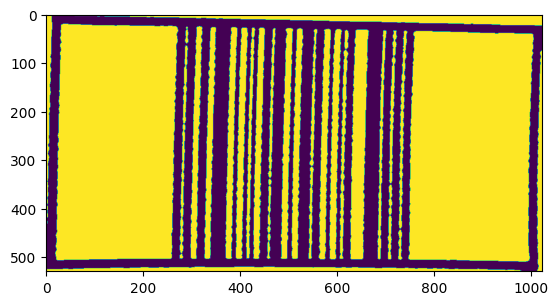

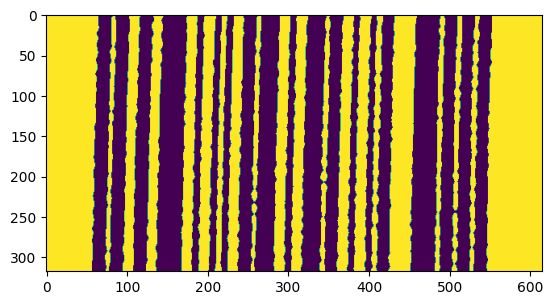

averaged_row: 2.0,1.0,2.0,2.0,2.0,2.0,4.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,3.0,2.0,1.0,2.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,4.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0
68
0[PXL_20240121_204221219]	d99e4a6e4ec961edb
1  1  0  1  1  0  0  1  1  0  0  1  1  1  1  0  0  1  0  0  1  0  1  0  0  1  1  0  1  1  1  0  0  1  0  0  1  1  1  0  1  1  0  0  1  0  0  1  0  1  1  0  0  0  0  1  1  1  1  0  1  1  0  1  1  0  1  1


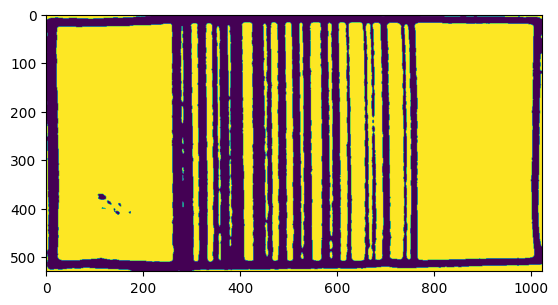

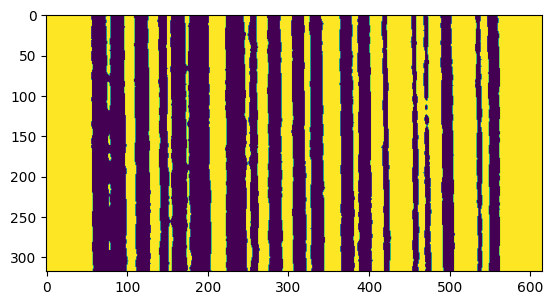

averaged_row: 3.0,1.0,3.0,2.0,3.0,2.0,2.0,1.0,3.0,0.0,4.0,3.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,4.0,2.0,1.0,2.0,2.0,1.0,5.0,1.0,1.0,1.0,2.0,2.0,5.0,1.0,2.0,2.0
80
0[PXL_20240121_013724688]	ee737f1ece6c36414c13
1  1  1  0  1  1  1  0  0  1  1  1  0  0  1  1  0  1  1  1  1  1  1  1  0  0  0  1  1  1  1  0  1  1  0  0  1  1  1  0  0  1  1  0  1  1  0  0  0  0  1  1  0  1  1  0  0  1  0  0  0  0  0  1  0  1  0  0  1  1  0  0  0  0  0  1  0  0  1  1


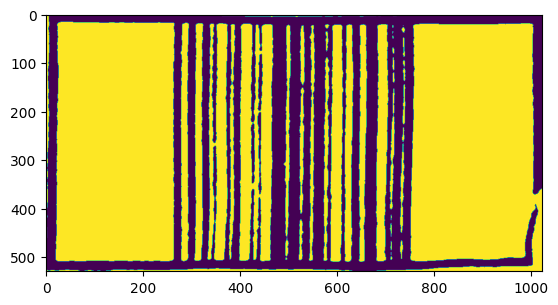

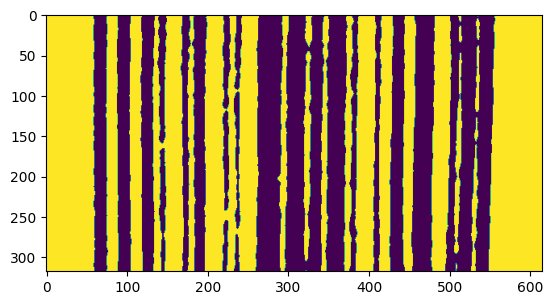

averaged_row: 2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,0.0,2.0,0.0,2.0
65
0[PXL_20240121_013803629.MP]	199a2c51eedd1339f
1  1  0  0  1  1  0  0  1  1  0  1  0  0  0  1  0  1  1  0  0  0  1  0  1  0  0  0  1  1  1  1  0  1  1  1  0  1  1  0  1  1  1  0  1  0  0  0  1  0  0  1  1  0  0  1  1  1  0  0  1  1  1  1  1


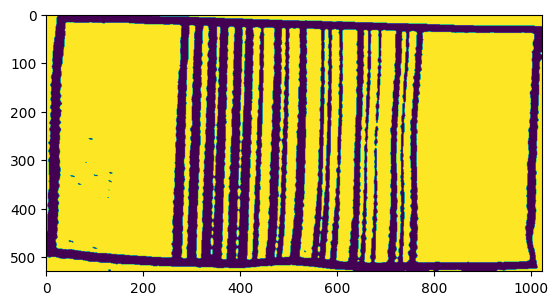

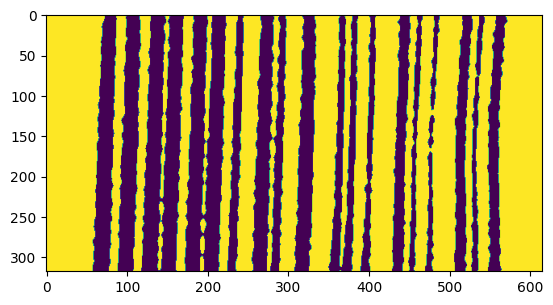

averaged_row: 3.0,2.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,3.0,1.0,2.0,4.0,3.0,5.0,2.0,1.0,1.0,3.0,1.0,5.0,2.0,1.0,1.0,3.0,1.0,5.0,2.0,2.0,1.0,3.0,2.0
88
0[PXL_20240121_184839130]	e73b9dcc3b0e0d10688323
1  1  1  0  0  1  1  1  0  0  1  1  1  0  1  1  1  0  0  1  1  1  0  1  1  1  0  0  1  1  0  0  0  0  1  1  1  0  1  1  0  0  0  0  1  1  1  0  0  0  0  0  1  1  0  1  0  0  0  1  0  0  0  0  0  1  1  0  1  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  1  1


In [22]:
for image_path in RESIZED_IMAGE_DIR.glob("*"):
    name = image_path.stem
    img = cv2.imread(str(image_path))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blur = cv2.blur(gray, (10, 5))

    _, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    show([thresh])

    h, w = thresh.shape[:2]
    cropped = thresh[int(h/5):int(4*h/5), int(w/5):int(4*w/5)]
    show([cropped])

    all_counts = []
    for i in range(0, int(3*h/5)):#, int(h/15)):
        row = cropped[i]

        last = -1
        last_count = 0

        counts = []
        for value in row:
            if value == last:
                last_count += 1
            else:
                if last != -1:
                    counts.append(last_count)

                last = value
                last_count = 1
        counts.append(last_count)

        # Chop off blank spaces
        counts = np.array(counts[1:-1])
        # print(counts)

        # Assuming the last bar is always two markers wide, we can use it as
        # a reference
        last_marker_size = counts[-1] - 1
        marker_size = last_marker_size/2

        # Skip the row entirely if we got junk
        if marker_size == 0:
            continue

        normalized_counts = counts / marker_size
        # print(np.rint(normalized_counts))

        all_counts.append(np.rint(normalized_counts))

    # print(all_counts)
    count_lengths = [len(count) for count in all_counts]
    median_length = max(set(count_lengths), key = count_lengths.count)

    valid_counts = [counts for counts in all_counts if len(counts) == median_length]

    averaged_row = np.rint(np.average(valid_counts, axis=0))
    # print(averaged_row)

    # counts, bins = np.histogram(averaged_row)
    # plt.stairs(counts, bins)
    # plt.show()


    print("averaged_row:", ",".join([str(i) for i in averaged_row]))


    bits = []
    last = True
    for count in averaged_row:
        bits.extend([1 if last else 0,] * int(count))
        last ^= True
    print(len(bits))

    value = 0
    for bit in bits:
        value = (value << 1) | bit

    print(f"{name}\t{value:016x}")
    print('  '.join([str(x) for x in bits]))